In [12]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/Documents/Study/Robotics/optimal_control_julia/lec_4/Project.toml`
Precompiling project...
  ✓ PrecompileTools
  ✓ StaticArrays
  ✓ Parsers
  ✓ ForwardDiff
  ✓ JSON
  ✓ Conda
  ✓ PyCall
  ✓ PyPlot
  8 dependencies successfully precompiled in 21 seconds (28 already precompiled)
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [11]:
Pkg.add("LinearAlgebra")
Pkg.add("ForwardDiff")
Pkg.add("PyPlot")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
    Updating `~/Documents/Study/Robotics/optimal_control_julia/lec_4/Project.toml`
  [37e2e46d] + LinearAlgebra
    Updating `~/Documents/Study/Robotics/optimal_control_julia/lec_4/Manifest.toml`
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
   Resolving package versions...
    Updating `~/Documents/Study/Robotics/optimal_control_julia/lec_4/Project.toml`
  [f6369f11] + ForwardDiff v0.10.36
    Updating `~/Documents/Study/Robotics/optimal_control_julia/lec_4/Manifest.toml`
  [d360d2e6] + ChainRulesCore v1.23.0
  [9e997f8a] + ChangesOfVariables v0.1.8
  [bbf7d656] + CommonSubexpressions v0.3.0
  [34da2185] + Compat v4.14.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [ffbed154] + DocStringExtensions v0.9.3
  [f6369f11] + ForwardDiff v0.10.36
  [3587e190] + InverseFunctions v0.1.12
  [92d709cd] + IrrationalConstants v0.2.2
  [692b3bcd] + JLLWrappers v1.5.0
  [2ab3a3ac] + Lo

In [13]:
using LinearAlgebra
using ForwardDiff
using PyPlot

[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]


In [15]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [16]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [17]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [18]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,…,1.23799,1.24099,1.24399,1.247,1.25

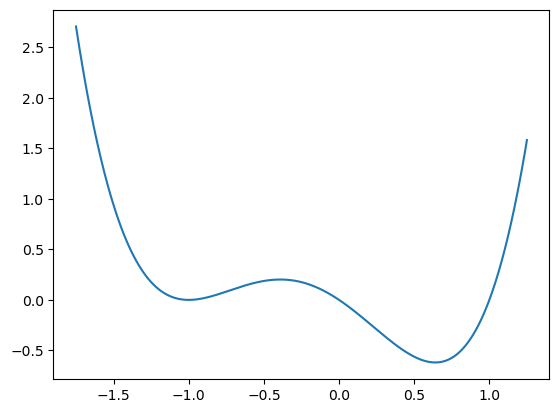

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x160e97dc0>

In [19]:
p = plot(x,f(x))

In [8]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

In [9]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

LoadError: UndefVarError: plot not defined

In [10]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

LoadError: UndefVarError: plot not defined

In [ ]:
∇2f(0.0)

In [ ]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

In [ ]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [ ]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [20]:
function backtracking_regularized_newton_step(x0)
    b = 0.1
    c = 0.5
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    Δx = -H\∇f(x0)
    
    α = 1.0
    while f(x0 + α*Δx) > f(x0) + b*α*∇f(x0)*Δx
        α = c*α
    end
    
    xn = x0 + α*Δx
end

backtracking_regularized_newton_step (generic function with 1 method)

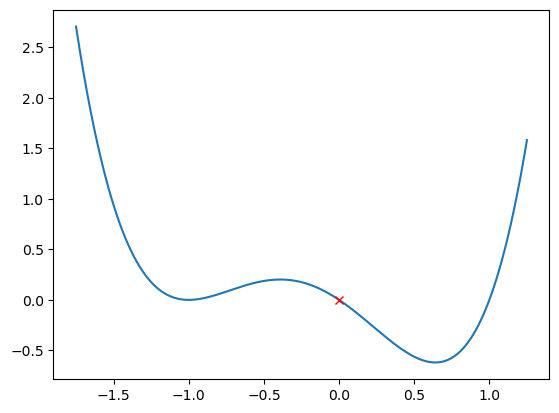

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x16109b940>

In [21]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

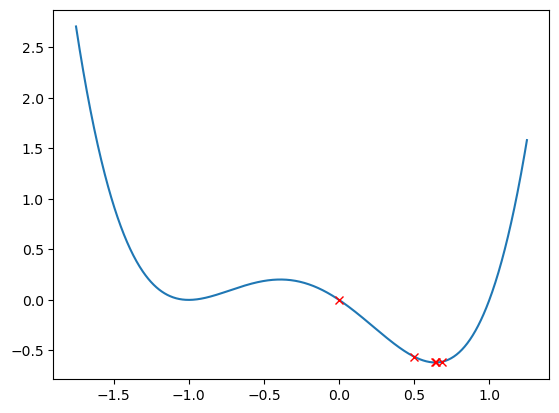

5-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1612e4a00>
 PyObject <matplotlib.lines.Line2D object at 0x1612e4a90>
 PyObject <matplotlib.lines.Line2D object at 0x1612e4b80>
 PyObject <matplotlib.lines.Line2D object at 0x1612e4c70>
 PyObject <matplotlib.lines.Line2D object at 0x1612e4d60>

In [25]:
xnew = backtracking_regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")